In [42]:
import pandas as pd
import numpy as np
import csv
import os
import re
import nltk
import itertools
import contractions

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('words')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.metrics.distance import edit_distance
from nltk.corpus import words

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from spellchecker import SpellChecker

import matplotlib.pyplot as plt
import seaborn as sns

#os.chdir('Documents/forum-classifier-python')
print(os.getcwd())

/Users/mayaechtinaw/Documents/forum-classifier-python


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mayaechtinaw/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mayaechtinaw/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mayaechtinaw/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/mayaechtinaw/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/mayaechtinaw/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [43]:
data = pd.read_csv('new_large_data.csv', encoding='latin1')
print(data.head())

                                             content  product
0  Well..I "had fixed" the exhaust manifold\n, th...  Chassis
1  It's always something with these toys. I had t...  Chassis
2  Got temp plates on Friday, passed emissions on...  Chassis
3  I've started looking into replacing shocks and...  Chassis
4  Quote:\nOriginally Posted by iamblum\nI've sta...  Chassis


In [44]:
contractions = {
    "ain't": "am not / are not",
    "aren't": "are not / am not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had / he would",
    "he'd've": "he would have",
    "he'll": "he shall / he will",
    "he'll've": "he shall have / he will have",
    "he's": "he has / he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how has / how is",
    "I'd": "I had / I would",
    "I'd've": "I would have",
    "I'll": "I shall / I will",
    "I'll've": "I shall have / I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it had / it would",
    "it'd've": "it would have",
    "it'll": "it shall / it will",
    "it'll've": "it shall have / it will have",
    "it's": "it has / it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she had / she would",
    "she'd've": "she would have",
    "she'll": "she shall / she will",
    "she'll've": "she shall have / she will have",
    "she's": "she has / she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as / so is",
    "that'd": "that would / that had",
    "that'd've": "that would have",
    "that's": "that has / that is",
    "there'd": "there had / there would",
    "there'd've": "there would have",
    "there's": "there has / there is",
    "they'd": "they had / they would",
    "they'd've": "they would have",
    "they'll": "they shall / they will",
    "they'll've": "they shall have / they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had / we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what shall / what will",
    "what'll've": "what shall have / what will have",
    "what're": "what are",
    "what's": "what has / what is",
    "what've": "what have",
    "when's": "when has / when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where has / where is",
    "where've": "where have",
    "who'll": "who shall / who will",
    "who'll've": "who shall have / who will have",
    "who's": "who has / who is",
    "who've": "who have",
    "why's": "why has / why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'alls": "you alls",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had / you would",
    "you'd've": "you would have",
    "you'll": "you shall / you will",
    "you'll've": "you shall have / you will have",
    "you're": "you are",
    "you've": "you have"
}

In [45]:
contraction_pattern = re.compile(r'\b(' + '|'.join(contractions.keys()) + r')\b')

def expand_contractions(text, contraction_mapping=contractions):
    def expand_match(contraction):
        match = contraction.group(0)
        expanded_contraction = contraction_mapping.get(match)
        if not expanded_contraction:
            expanded_contraction = contraction_mapping.get(match.lower())
        return expanded_contraction

    expanded_text = contraction_pattern.sub(expand_match, text)
    return expanded_text

In [46]:
def removeWord(text, word):
    return text.replace(word, '')

def removeURL(text):
    url_pattern = re.compile(r'https://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

def removeHTML(text):
    html_tags_pattern = r'<.*?>'
    return re.sub(html_tags_pattern, '', text)

In [47]:
def preprocessText(text):
    stop_words = set(stopwords.words('english'))  # Define stop words
    stemmer = PorterStemmer()  # Define stemmer
    lemmatizer = WordNetLemmatizer()  # Define lemmatizer
    spell = SpellChecker()  # Define spell checker
    text['content'] = text['content'].apply(expand_contractions)  # Apply contraction expansion
    text['content'] = text['content'].apply(lambda x: removeURL(x))  # Remove URLs
    text['content'] = text['content'].apply(lambda x: removeHTML(x))  # Remove HTML tags
    text['content'] = text['content'].str.lower()  # Lowercase all words
    text['content'] = text['content'].apply(lambda x: re.sub(r'[^a-zA-Z0-9 \s]', ' ', x))  # Remove special characters
    text['content'] = text['content'].apply(lambda x: removeWord(x, 'quote'))
    text['content'] = text['content'].str.split().map(lambda sl: " ".join(s for s in sl if len(s) > 2))  # Remove words with length < 2

    
    text['tokenized'] = text.apply(lambda row: nltk.word_tokenize(row['content']), axis=1)  # Tokenizing
    text['tokenized'] = text['tokenized'].apply(lambda x: [item for item in x if item not in stop_words])  # Remove stop words
    text['tokenized'] = text['tokenized'].apply(lambda x: [stemmer.stem(y) for y in x])  # Stemming
    text['tokenized'] = text['tokenized'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x])  # Lemmatizing
    text['clean_string'] = text['tokenized'].str.join(' ')  # De-tokenizes string
    return text

In [48]:
data = preprocessText(data)
print(data['content'])

0       well had fixed the exhaust manifold the exhaus...
1       always something with these toys had the banks...
2       got temp plates friday passed emissions friday...
3       have started looking into replacing shocks and...
4       originally posted iamblum have started looking...
                              ...                        
1062    our the baggage doors have been getting harder...
1063    good work tom one the first things did was adj...
1064    never had side baggage doors until current uni...
1065    cargo door locks won open had the dutch star f...
1066    don have newmar but winnabego sometimes have p...
Name: content, Length: 1067, dtype: object


In [49]:
relevant_products = [ 'Door Locks and Parts', 'Exterior', 'Hardware', 'Heating and Cooling',
                    'Lights', 'Plumbing and Water', 'Wiper Parts', 'Adhesives, Sealants, and Cleaners', 'Winterizing',
                    'Interior']
data = data[data['product'].isin(relevant_products)]

product_mapping = {
    'Chassis': 0,
    'Door Locks and Parts': 1,
    'Electrical': 2,
    'Exterior': 3,
    'Hardware': 4,
    'Heating and Cooling': 5,
    'Lights': 6,
    'Plumbing and Water': 7,
    'Wiper Parts': 8,
    'Adhesives, Sealants, and Cleaners': 9,
    'Winterizing': 10,
    'Interior': 11
}

In [50]:
data['label'] = data['product'].apply(lambda x: product_mapping[x])
print(data.head())

                                              content             product  \
24  today removed carefree slide out cover and rev...            Exterior   
25  well always seem doing something minor just sp...  Plumbing and Water   
40  while getting ready for our first trip with ou...            Hardware   
45  our door power awning stopped working determin...            Exterior   
48     replaced the pawls our 2008 tow dolly ratchets            Hardware   

                                            tokenized  \
24  [today, remov, carefre, slide, cover, revers, ...   
25  [well, alway, seem, someth, minor, spend, time...   
40  [get, readi, first, trip, new, load, readi, mo...   
45  [door, power, awn, stop, work, determin, awn, ...   
48          [replac, pawl, 2008, tow, dolli, ratchet]   

                                         clean_string  label  
24  today remov carefre slide cover revers small t...      3  
25  well alway seem someth minor spend time latest...      7  
40  g

In [51]:
X = data['content']
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [53]:
classifier = MultinomialNB()
classifier.fit(X_train_vect, y_train)

MultinomialNB()

In [54]:
y_pred = classifier.predict(X_test_vect)

In [55]:
labels = sorted(set(y_test).union(set(y_pred)))

# Define the target_names using the keys of product_mapping
target_names = list(product_mapping.keys())

# Print the classification report with explicitly specified labels and target names
print(classification_report(y_test, y_pred, labels=labels, target_names=target_names))

                                   precision    recall  f1-score   support

                          Chassis       0.62      0.89      0.73         9
             Door Locks and Parts       0.54      0.88      0.67        16
                       Electrical       1.00      0.47      0.64        15
                         Exterior       0.93      1.00      0.96        13
                         Hardware       0.71      0.94      0.81        18
              Heating and Cooling       1.00      0.84      0.91        19
                           Lights       0.92      0.80      0.86        15
               Plumbing and Water       1.00      0.62      0.76        13
                      Wiper Parts       1.00      0.73      0.84        11

                         accuracy                           0.80       129
                        macro avg       0.86      0.80      0.80       129
                     weighted avg       0.86      0.80      0.80       129



/Users/mayaechtinaw/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:2126: UserWarning: labels size, 9, does not match size of target_names, 12
  warnings.warn(


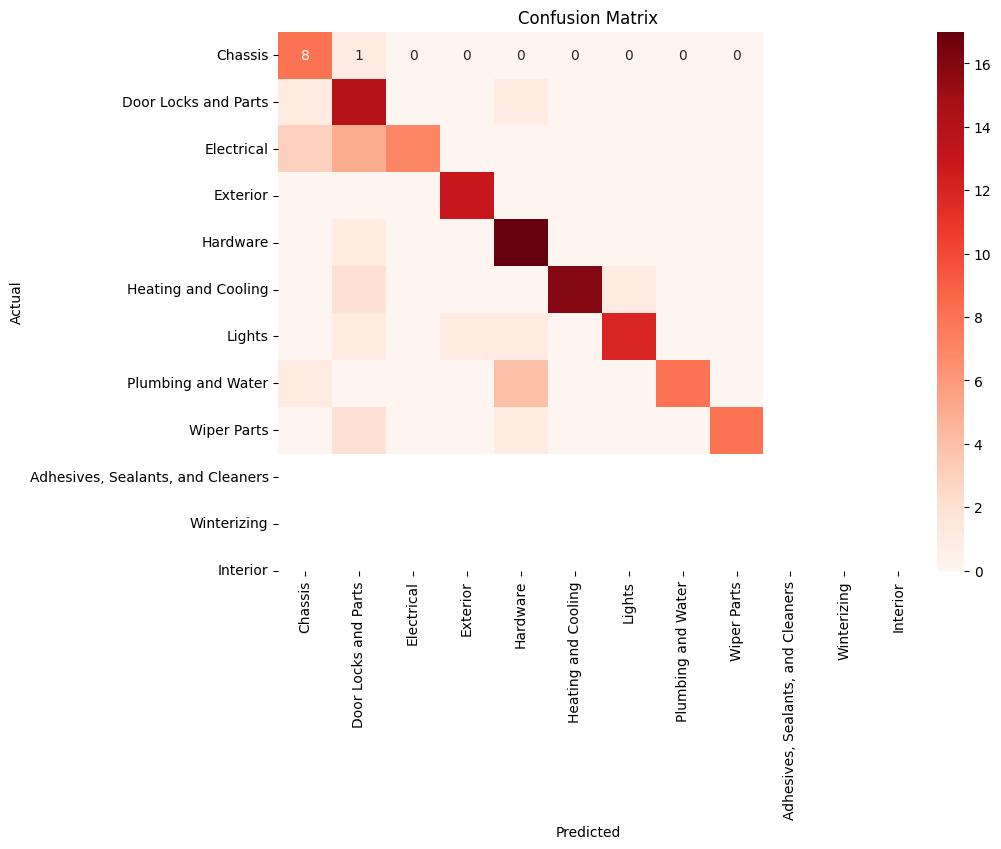

In [56]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=product_mapping.keys(), yticklabels=product_mapping.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [58]:
import pickle

with open('trained_classifier.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)
    pickle.dump(classifier, file)